<a href="https://colab.research.google.com/github/kawthar-mohammed/Day-17/blob/main/EDA__Usecase_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [397]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [398]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [399]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [400]:
!pip install ydata-profiling


In [401]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="player Profiling Report")

# profile.to_notebook_iframe()
# profile.to_file("player Profiling Report")

after generating profile report I undersatend that:

1-the current value of the player is highly correlated with the apperance,highest_value and minutes played.

2- assists and goals is highly correlated with each other.

3-goals conceded is highly overall correlated with clean sheets

4-games_injured is highly overall correlated with days_injured and highest_value.

### Data Quality Checks



#### 1. Reliability:
This dataset was generated by scraping data from Transfermarkt.

#### 2. Timeliness:
the dataset collectiog time is compatiable with spesified period.

#### 3. Consistency:



#### 4. Relevance:
the dataset sample is relevance with analysis opjective

#### 5. Uniqueness:
the dataset does not have duplicated values


#### 6. Completeness:
the datasset is complete

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### 7. Check Accuracy
the data type for each columns is appropriate.

as I have low knowledge of football I will deal with outlier on the selected feature.

In [403]:
# check outliers
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [404]:
#delete columns.
df.drop(columns = ['player', 'name'],inplace = True)

In [405]:
df['position'].value_counts()

,count
position,
Defender Centre-Back,1821
Attack Centre-Forward,1353
Goalkeeper,1229
midfield-CentralMidfield,1149
midfield-DefensiveMidfield,900
Defender Right-Back,867
Defender Left-Back,807
midfield-AttackingMidfield,769
Attack-RightWinger,717


In [406]:
df['team'].value_counts()

,count
team,
Daejeon Hana Citizen,46
Jeonbuk Hyundai Motors,46
FC Seoul,45
Gangwon FC,43
Daegu FC,42
...,...
FC Barcelona,22
Atlético de Madrid,22
CA Osasuna,22


In [407]:
df['position_encoded'].value_counts()
# we have position column that show same fact with more readable value

,count
position_encoded,
2,3528
3,3095
4,2902
1,1229


In [408]:
df.drop(columns = ['position_encoded'],inplace = True)

In [409]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'winger'],
      dtype='object')

In [410]:

import plotly.express as px

cols_for_heatmap = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'winger']
df_heatmap = df[cols_for_heatmap]


fig = px.imshow(df_heatmap.corr(), color_continuous_scale='RdBu')
fig.update_xaxes(side="top")
fig.show()


'highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals' and 'position_encoded' is highly correlaed with current_value.

In [411]:
#one hot encoding
df = pd.get_dummies(df, columns=['position','team'])

In [412]:
df.shape


(10754, 407)

In [413]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
                         ...   
position_Attack       -0.027709
position_midfield     -0.032972
age                   -0.050156
goals conceded        -0.063529
position_Goalkeeper   -0.077891
Name: current_value, Length: 407, dtype: float64


In [414]:
# Set the correlation threshold
threshold = 0.1 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Bayern Munich', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Liverpool FC', 'team_Manchester City',
       'team_Manchester United', 'team_Paris Saint-Germain',
       'team_Real Madrid', 'team_SSC Napoli', 'team_Tottenham Hotspur'],
      dtype='object')

In [415]:
df = df[selected_features]
df.head()

,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,team_Arsenal FC,team_Bayern Munich,team_Chelsea FC,team_FC Barcelona,team_Liverpool FC,team_Manchester City,team_Manchester United,team_Paris Saint-Germain,team_Real Madrid,team_SSC Napoli,team_Tottenham Hotspur
0,104,0.000000,0.000000,9390,42,5,13,15000000,70000000,False,False,False,False,False,False,True,False,False,False,False
1,15,0.000000,0.000000,1304,510,58,1,1500000,22000000,False,False,False,False,False,False,True,False,False,False,False
2,4,0.000000,0.000000,292,697,84,4,600000,6000000,False,False,False,False,False,False,True,False,False,False,False
3,82,0.028090,0.056180,6408,175,22,9,50000000,50000000,False,False,False,False,False,False,True,False,False,False,False
4,63,0.017889,0.017889,5031,238,51,21,40000000,80000000,False,False,False,False,False,False,True,False,False,False,False


In [416]:
df.shape

(10754, 20)

In [417]:
df.columns

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Bayern Munich', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Liverpool FC', 'team_Manchester City',
       'team_Manchester United', 'team_Paris Saint-Germain',
       'team_Real Madrid', 'team_SSC Napoli', 'team_Tottenham Hotspur'],
      dtype='object')

In [418]:
df.describe()

,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04
mean,36.407011,0.125554,0.086978,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06
std,26.526541,0.235585,0.143351,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,12.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05
50%,35.000000,0.045969,0.040773,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06
75%,59.000000,0.172263,0.133136,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06
max,107.000000,11.250000,4.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08


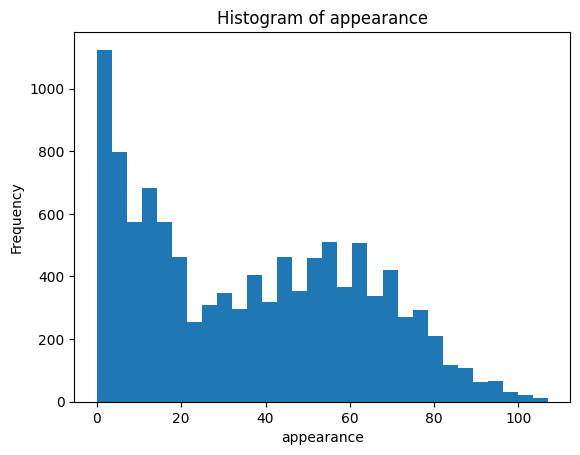

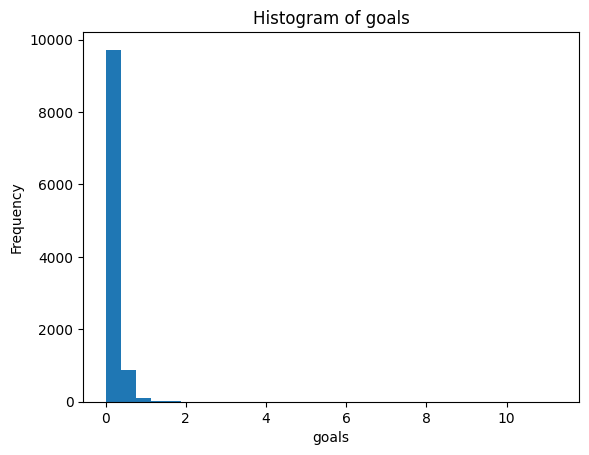

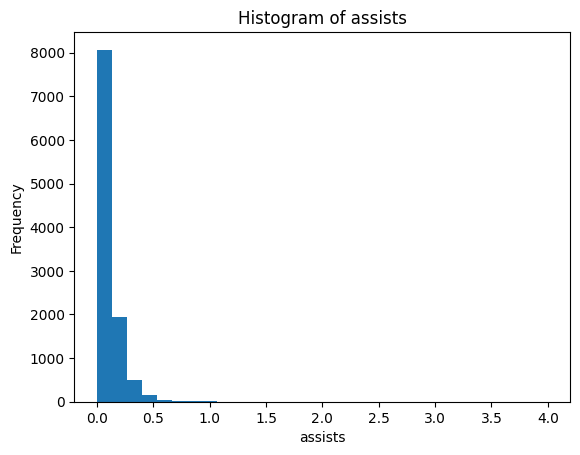

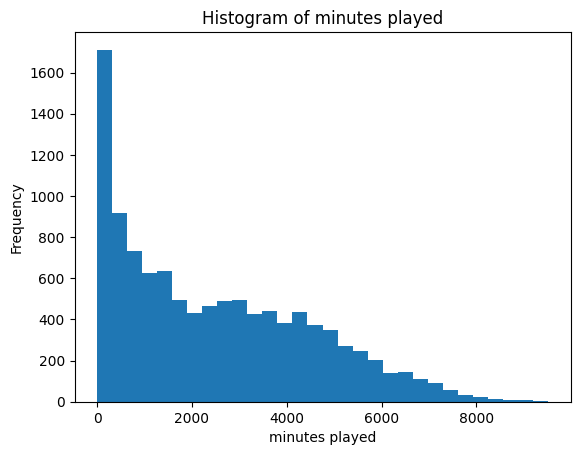

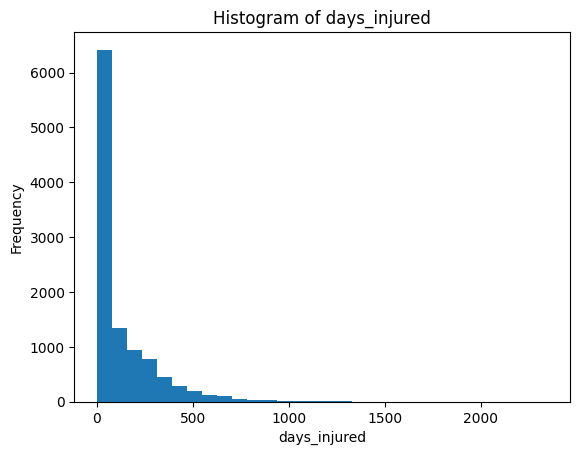

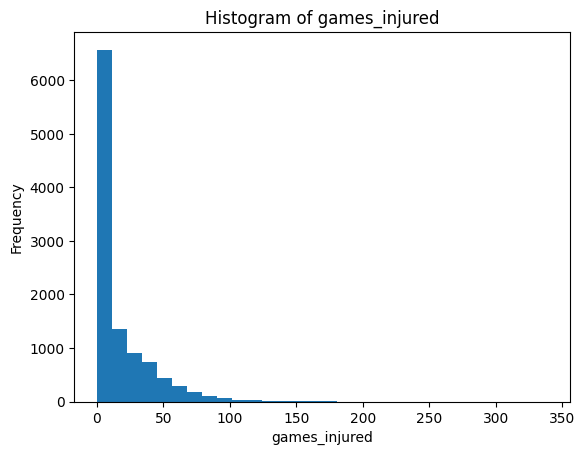

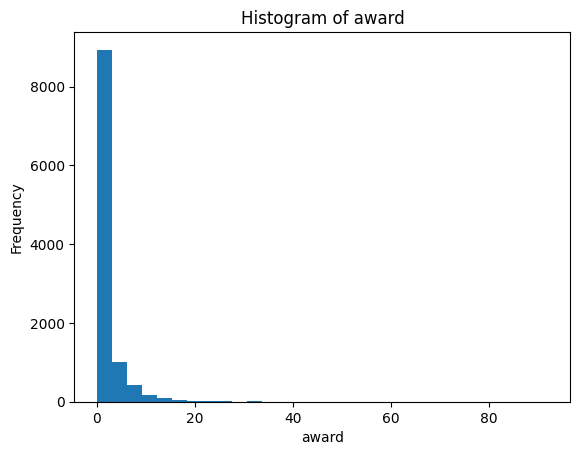

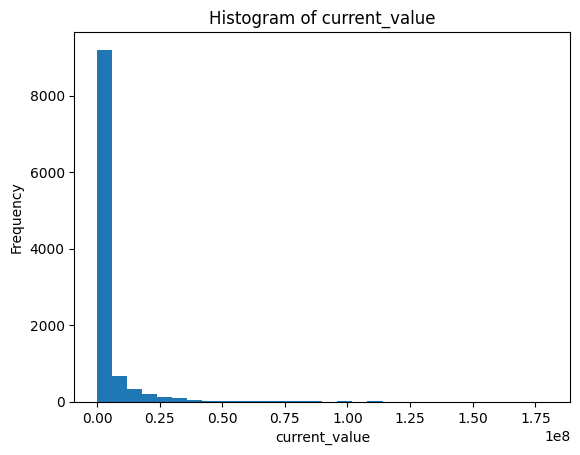

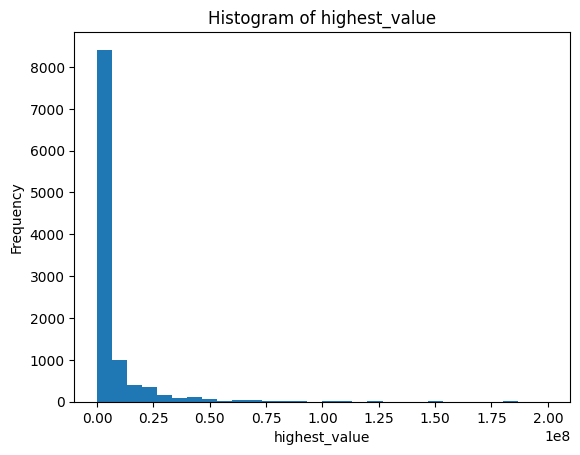

In [419]:
# I need to see histogram for all the columns that showen in describe function:

columns_to_plot = ['appearance','goals','assists','minutes played','days_injured',
                   'games_injured','award','current_value','highest_value']
for column in columns_to_plot:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df[column], bins = 30)
    plt.title(f'Histogram of {column}')  # Set a title for the histogram
    plt.xlabel(column)  # Set x label
    plt.ylabel('Frequency')  # Set y label
    plt.show()  # Show plot

In [420]:
 df['appearance'].quantile(0.95)
 df= df[df['appearance']<=80]

In [421]:
df.columns

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Bayern Munich', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Liverpool FC', 'team_Manchester City',
       'team_Manchester United', 'team_Paris Saint-Germain',
       'team_Real Madrid', 'team_SSC Napoli', 'team_Tottenham Hotspur'],
      dtype='object')

In [422]:
# because I do not have high knowledage of football Iwill consider values that are
#grater than 97 percentile as outlier.

df= df[df['appearance']<=df['appearance'].quantile(0.95)]
df= df[df['goals']<=df['goals'].quantile(0.97)]
df= df[df['assists']<=df['assists'].quantile(0.95)]
df= df[df['minutes played']<=df['minutes played'].quantile(0.95)]
df= df[df['days_injured']<=df['days_injured'].quantile(0.95)]
df= df[df['games_injured']<=df['games_injured'].quantile(0.95)]
df= df[df['award']<=df['award'].quantile(0.95)]
df= df[df['current_value']<=df['current_value'].quantile(0.95)]
df= df[df['highest_value']<=df['highest_value'].quantile(0.95)]

In [423]:
df.shape

(6727, 20)

Prepare train and test data

In [424]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [425]:
from sklearn.svm import SVR #Import the SVR class
from sklearn.model_selection import GridSearchCV
## This statement allows the visuals to render within your Jupyter Notebook

In [426]:
X.shape

(6727, 19)

## Buliding the Model

In [427]:
model = LinearRegression()

## Train the Model

In [428]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [429]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)      # Linear regression model

## Interpretation of the Model

In [430]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients

In [431]:
coeff_df

,Coefficient
appearance,-1.385215e+05
goals,3.815319e+04
assists,3.188624e+04
minutes played,1.976406e+05
days_injured,3.256885e+04
games_injured,-1.411838e+05
award,-8.941872e+04
highest_value,1.041032e+06
team_Arsenal FC,-5.820766e-11
team_Bayern Munich,0.000000e+00


In [432]:
print(f" Linear regression intercept: {model.intercept_}")

 Linear regression intercept: 952507.8981601932


## Evaluating the Model

In [433]:
y_base = [y_train.mean()] * len(y_test)

In [434]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 1.526266e+12


In [435]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 8.702595e+05


In [436]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 4.107049e+05
Mean Absolute Error for testing: 4.207157e+05


In [437]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6839349725084891
R Square for testing: 0.669227378362318


In [438]:
predictions = model.predict(X_test_scaled)
#predictions

In [439]:
Real_Values = np.array(y_test)
# Real_Values

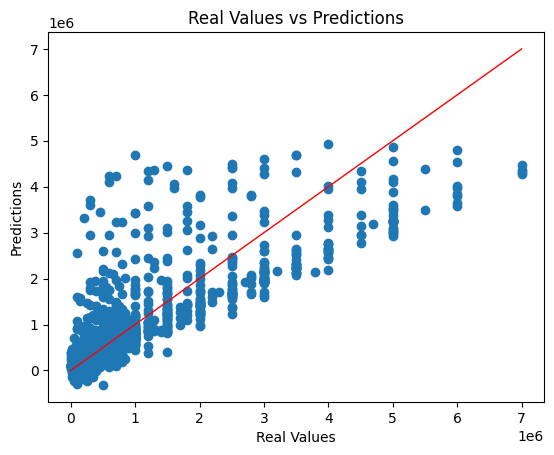

In [440]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

In [441]:
from sklearn.preprocessing import PolynomialFeatures

In [442]:
# the model is bad so Iwill try polynomil regression
# 4. Create Polynomial Features
degree = 3 # Set the degree of the polynomial (try 2, 3, 4, etc.)
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)  # Transform training features
X_test_poly = poly.transform(X_test)

In [443]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [444]:
# Predict and evaluate the model
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

In [445]:
# coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients

In [446]:
# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 491204481392.09326
R-squared: 0.6780981379305656


In [447]:

mae_train = mean_absolute_error(y_train, model.predict(X_train_poly))
mae_test = mean_absolute_error(y_test,y_pred_test)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 4.170391e+05
Mean Absolute Error for testing: 4.208900e+05
